# Epileptic Seizure Recognition Dataset. K_Means. Elbow Method

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [2]:
data = pd.read_csv('epileptic_data.csv')
data.describe()
X = data.drop(columns=['y', 'Unnamed: 0'])

In [3]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [4]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [5]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858


In [7]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
count,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,...,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04,1.150000e+04
mean,1.358816e-18,-1.254552e-17,-3.419970e-17,1.060987e-16,8.987014e-17,7.345332e-17,-2.751905e-17,-3.013531e-17,-2.045224e-17,8.230132e-18,...,-1.380538e-17,-1.720846e-17,-3.127933e-18,-4.017439e-17,9.639029e-17,2.647641e-17,-1.765255e-17,4.028058e-17,-3.613052e-17,9.212438e-18
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,...,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-1.103387e+01,-1.100308e+01,-1.115976e+01,-1.138431e+01,-1.107509e+01,-1.084787e+01,-1.130614e+01,-1.092647e+01,-1.131571e+01,-1.159907e+01,...,-1.119966e+01,-1.127788e+01,-1.115530e+01,-9.665311e+00,-1.014144e+01,-1.107705e+01,-1.126415e+01,-1.085584e+01,-1.052666e+01,-1.102130e+01
25%,-2.561215e-01,-2.655092e-01,-2.679404e-01,-2.781619e-01,-2.856698e-01,-2.913217e-01,-2.941761e-01,-2.980214e-01,-2.989761e-01,-2.981472e-01,...,-2.753832e-01,-2.724289e-01,-2.670577e-01,-2.554575e-01,-2.511501e-01,-2.489488e-01,-2.615475e-01,-2.596549e-01,-2.613838e-01,-2.596645e-01
50%,2.162427e-02,1.753402e-02,1.949110e-02,7.088113e-03,6.049487e-05,-6.177233e-03,-9.277254e-03,-8.098531e-03,-2.727952e-03,-5.183373e-03,...,9.071501e-03,6.958815e-03,9.812945e-03,1.746387e-02,2.176736e-02,2.010944e-02,2.462978e-02,2.274639e-02,2.103399e-02,1.938582e-02
75%,2.752182e-01,2.764884e-01,2.824604e-01,2.799360e-01,2.671562e-01,2.665697e-01,2.570412e-01,2.633186e-01,2.626610e-01,2.581724e-01,...,2.693173e-01,2.681256e-01,2.746457e-01,2.725860e-01,2.768858e-01,2.831886e-01,2.864515e-01,2.867302e-01,2.850333e-01,2.802372e-01
max,1.049143e+01,1.038173e+01,1.044041e+01,1.005285e+01,9.478851e+00,1.130042e+01,1.271827e+01,1.266832e+01,1.267423e+01,1.279796e+01,...,1.244640e+01,1.085449e+01,8.929863e+00,7.902517e+00,8.600867e+00,1.044163e+01,1.200145e+01,1.264486e+01,1.264388e+01,1.169097e+01


## Elbow Method

[2047000.0, 2000552.745377958, 1957534.6381145867, 1919488.1427004074, 1886552.5915264, 1859195.2831665308, 1834666.6503367396, 1810977.6956352678, 1796602.051506855]


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

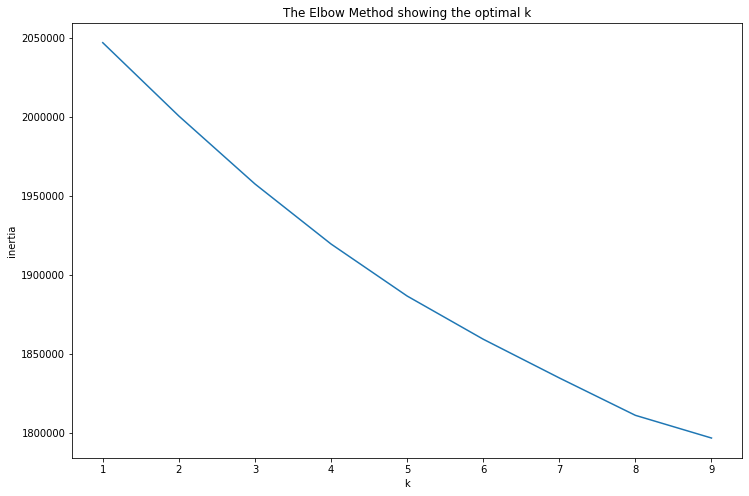

In [8]:
inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i)#.fit(X)
    km.fit(X)
    inertia.append(km.inertia_)

print(inertia)

plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

[0.07003799304400396, 0.0680005134519882, 0.06415583964998647, 0.08042589920281104, 0.08210878879495541, 0.08557325734649943, 0.08565980703515126, 0.08620017032150167]


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

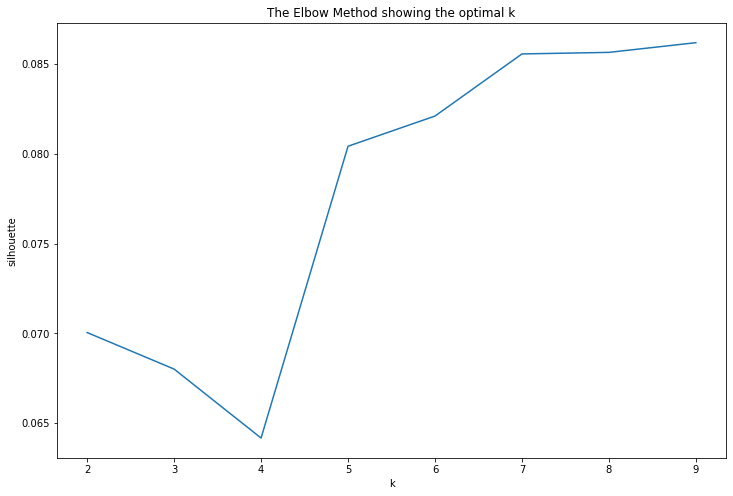

In [9]:
silhouette = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i)#.fit(X)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

print(silhouette)
    
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Elbow Method showing the optimal k')